In [1]:
library(magrittr)
library(ggplot2)

The logistic map function takes the form $x_{t+1} = Rx_t(1-x_t)$  
where:  
$R$ = growth factor (reproductive constant)  
$x_t$ = ratio of population to maximum population at time $t$

In [13]:
logisticMap <- function(r, x0, n){
    x <- c(x0)
    for(i in 1:n){
        x[i+1] <- r * x[i] * (1 - x[i]) # the logistic map
    }
    return(x)
}

In [20]:
x <- logisticMap(r = 2.1, x0 = 0.5, n = 50)
x <- data.frame(x_t = x, t = 1:length(x))

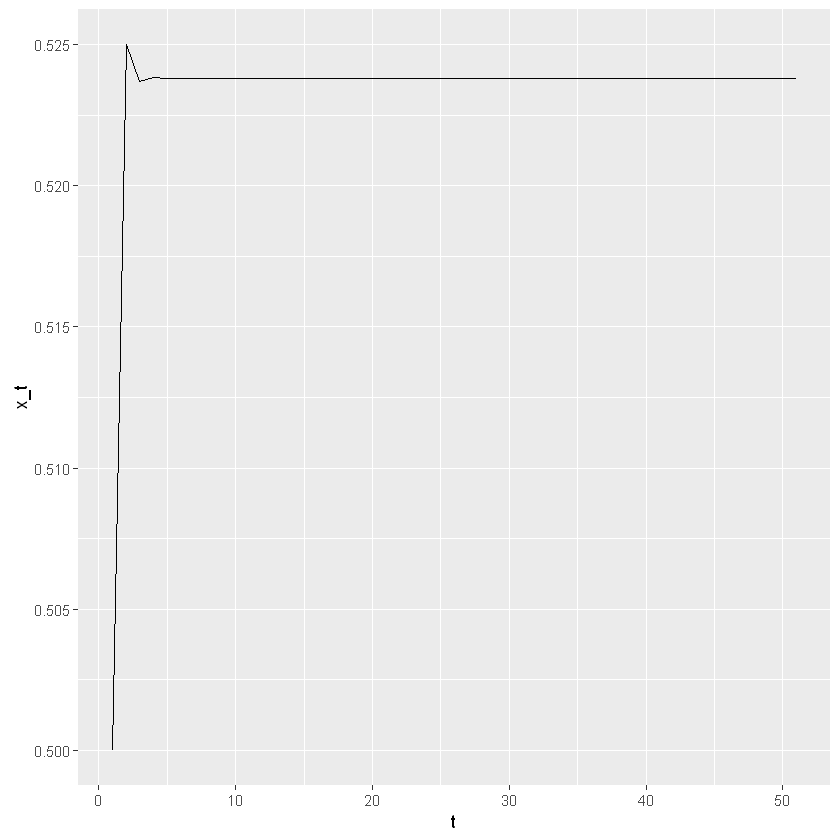

In [21]:
ggplot(data = x, aes(x = t, y = x_t)) + geom_line()

The behavior of this function is a function of $R$ and is sensitive to initial values.  
With $R = 2.1$, $x_t$ quickly reaches a stable point at $\frac{(r-1)}{r}$  
Other values of $R$ will cause $x_t$ to fall to zero (the entire population dies and cannot recover), or will cause oscillating behavior (the population reaches a maximum and then suffers a collapse, only to repeat the pattern indefinitely), and at high enough values, will cause chaotic behavior (does not reach an equilibrium).

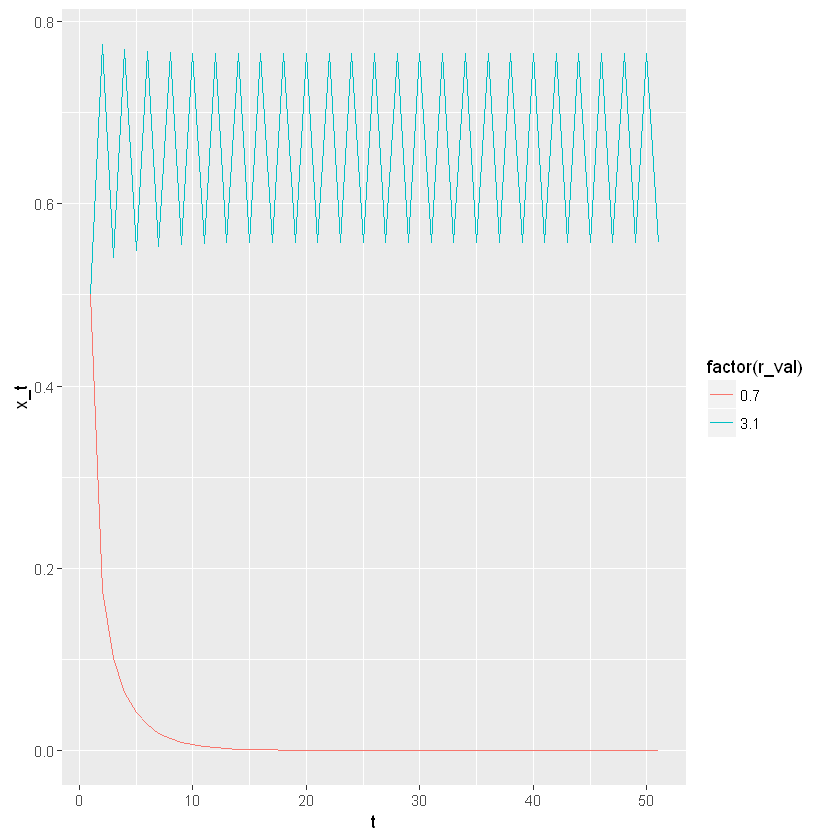

In [28]:
r_0.7 <- logisticMap(r = .7, x0 = 0.5, n = 50) %>% data.frame(t = 1:length(.), x_t = ., r_val = rep(0.7, length(.)))
r_3.1 <- logisticMap(r = 3.1, x0 = 0.5, n = 50) %>% data.frame(t = 1:length(.), x_t = ., r_val = rep(3.1, length(.)))
dat <- rbind(r_0.7, r_3.1)
ggplot(dat, aes(x = t, y = x_t, group = r_val)) + geom_line(aes(color = factor(r_val)))

When $R = 3.1$ the system quickly began to oscillate between two values as the population would quickly rise and then suffer a crash due to starvation.  
When $R = 0.7$ the system quickly moved to $x = 0$ and remained there. This represents the population dying off faster than it can reproduce.  

Since the behavior of the system is dependent on $R$, we can vary $R$ across a range of values and see if the system comes to equilibrium at one or more $x$ values. We can plot these $x$ values on a bifurcation plot to show how the stable outcomes branch in relation to $R$.

In [34]:
bifurcateLM <- function(r.from = 2.5, r.to = 4, r.num = 100, x0 = rand(1, 0, 1), x.num = 500){
    r_seq <- seq(from = r.from, to = r.to, length.out = r.num)
    r <- c()
    x_t <- c()
    x_from <- max(1, x.num - 100)
    for(i in 1:length(r_seq)){
        x_s <- unique(logisticMap(r = r_seq[i], x0 = x0, n = x.num)[x_from:(x.num+1)])
        r_s <- rep(r_seq[i], length(x_s))
        r <- c(r, r_s)
        x_t <- c(x_t, x_s)
    }
    return(data.frame(r_val = r, x_val = x_t))
}
x <- bifurcateLM(r.from = 2.8, r.to = 4, r.num = 1000, x0 = 0.5, x.num = 1000)

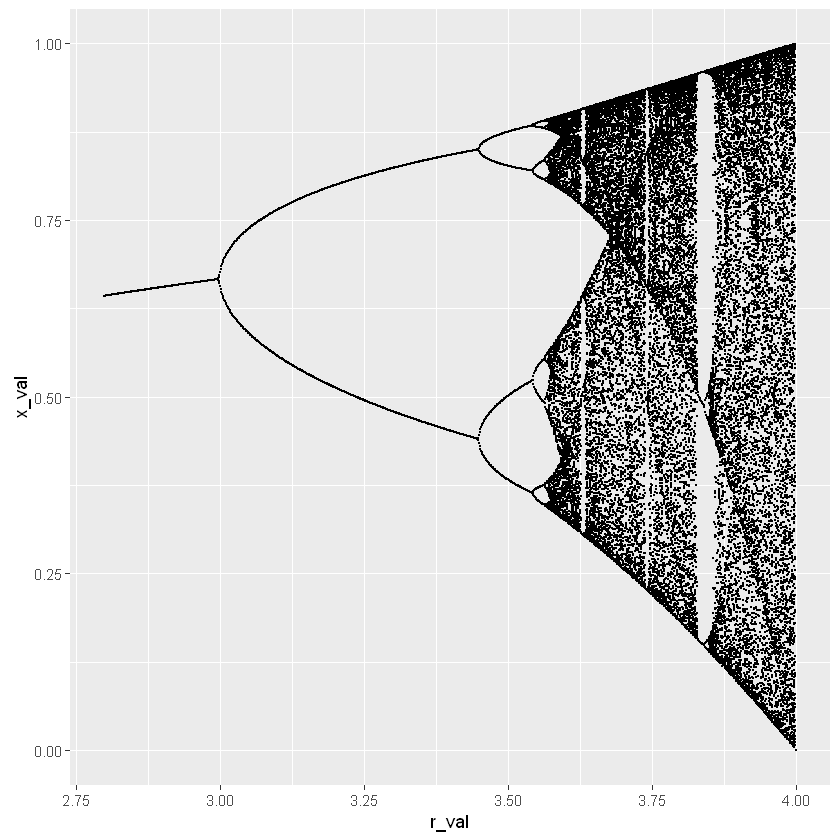

In [37]:
ggplot(x, aes(x = r_val, y = x_val)) + geom_point(size = .25)

This is the classic bifurcation plot associated with the logistic map. For $R$ values less than 3, there is only one stable solution. When $R > 3$ multiple stable solutions appear, with the number of stable points increasing as a function of $R$. When $R$ gets above about 3.6, chaotic behavior appears as the system no longer finds a stable solution, but osciallates between an increasing number of points. Especially interesting is the fact that "islands of normalcy" occur in the bifurcation where the chaos dies down and the system osciallates between a handful of points.

The logistic map is fascinating because it is a relatively simple deterministic function which generates complex, chaotic behavior. Chaos is not dependent on stochastic systems, but can occur as an emergent property of deterministic functions.